In [34]:
from dl import queryClient as qc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import functions.coords as coords
from astropy.table import Table
%matplotlib notebook

In [2]:
desdata = Table.read("DES_LT-NSC_DR2-vtan-row_matched.fits", 1)
for i in range(len(desdata)):
    desdata['ID'][i] = desdata['ID'][i].strip()

In [3]:
obj = qc.query(sql='select * from nsc_dr2.hpm where ndet>50 limit 20',fmt='table',profile='db01')
# meas = qc.query(sql="select mjd,ra,dec,mag_auto,raerr,decerr,filter from nsc_dr2.meas where objectid='13694_5947'",fmt='table',profile='db01')
#13694_5947

In [136]:
obj.colnames

['ra',
 'dec',
 'mjd',
 'glon',
 'glat',
 'elon',
 'elat',
 'pix',
 'raerr',
 'decerr',
 'pmra',
 'pmdec',
 'pmraerr',
 'pmdecerr',
 'deltamjd',
 'umag',
 'urms',
 'uerr',
 'uasemi',
 'ubsemi',
 'utheta',
 'gmag',
 'grms',
 'gerr',
 'gasemi',
 'gbsemi',
 'gtheta',
 'rmag',
 'rrms',
 'rerr',
 'rasemi',
 'rbsemi',
 'rtheta',
 'imag',
 'irms',
 'ierr',
 'iasemi',
 'ibsemi',
 'itheta',
 'zmag',
 'zrms',
 'zerr',
 'zasemi',
 'zbsemi',
 'ztheta',
 'ymag',
 'yrms',
 'yerr',
 'yasemi',
 'ybsemi',
 'ytheta',
 'vrmag',
 'vrrms',
 'vrerr',
 'vrasemi',
 'vrbsemi',
 'vrtheta',
 'asemi',
 'asemierr',
 'bsemi',
 'bsemierr',
 'theta',
 'thetaerr',
 'fwhm',
 'class_star',
 'ebv',
 'rmsvar',
 'madvar',
 'iqrvar',
 'etavar',
 'jvar',
 'kvar',
 'chivar',
 'romsvar',
 'nsigvar',
 'htm9',
 'ring256',
 'nest4096',
 'random_id',
 'ndet',
 'nphot',
 'ndetu',
 'nphotu',
 'ndetg',
 'nphotg',
 'ndetr',
 'nphotr',
 'ndeti',
 'nphoti',
 'ndetz',
 'nphotz',
 'ndety',
 'nphoty',
 'ndetvr',
 'nphotvr',
 'flags',
 'var

In [68]:
def plots(idv):
    dataselect = "select mjd,ra,dec,mag_auto,raerr,decerr,filter from nsc_dr2.meas where objectid='" + idv + "'"
    meas = qc.query(sql=dataselect,fmt='table',profile='db01')
    plt.subplots(2,2, figsize = (9,6))
    plt.subplots_adjust(hspace = .4, wspace = .4)
    plt.suptitle(idv)
    meas["mjd"] -= min(meas["mjd"])
    mjd = (meas["mjd"]/365)+1
    cenra = np.mean(meas["ra"])
    cendec = np.mean(meas["dec"])
    mag = meas["mag_auto"]
    filters = meas["filter"]
    dra, ddec = coords.rotsphcen(meas["ra"], meas["dec"], cenra, cendec, gnomic = True)
    dra = dra*3600
    ddec = ddec*3600
    goodind = np.where(np.logical_and(abs(ddec) < 500, abs(dra) < 500))             
    ddec = ddec[goodind]
    dra = dra[goodind]
    mjd = mjd[goodind]
    filters = filters[goodind]
    mag = mag[goodind]
    
    #radec code
    plt.subplot(2,2,1)
    plt.scatter(dra, ddec, c = mjd)
    diffra = max(dra) - min(dra)
    diffdec = max(ddec) - min(ddec)
    plt.xlim(min(dra) - diffra/4, max(dra) + diffra/4)
    plt.ylim(min(ddec) - diffdec/4, max(ddec) + diffdec/4)
    m, b = np.polyfit(dra, ddec, 1)
    plt.plot(dra, m*dra + b, c = "m")
    plt.xlabel("dra")
    plt.ylabel("ddec")
    
    #ratime
    plt.subplot(2,2,2)
    plt.scatter(mjd, dra)
#     plt.errorbar(mjd, dra, yerr = meas["raerr"], ls = "none")
#     x1,y1 = findmeanpoints(dra,mjd)
#     plt.plot(x1,y1, c = "k")
#     plt.scatter(x1,y1, facecolors='none', edgecolors='k')
    diffmjd = max(mjd) - min(mjd)
    plt.xlim(min(mjd) - diffmjd/4,  max(mjd) + diffmjd/4)
    plt.ylim(min(dra) - diffra/4, max(dra) + diffra/4)
    m, b = np.polyfit(mjd, dra, 1)
    plt.plot(mjd, m*mjd + b, c = "m")
    plt.xlabel("MJD")
    plt.ylabel("dra")
    
    #dectime
    plt.subplot(2,2,4)
    plt.scatter(mjd, ddec)
#     x1,y1 = findmeanpoints(ddec,mjd)
#     plt.plot(x1,y1, c = "k")
#     plt.scatter(x1,y1, facecolors='none', edgecolors='k')
    plt.xlim(min(mjd) - diffmjd/4,  max(mjd) + diffmjd/4)
    plt.ylim(min(ddec) - diffdec/4, max(ddec) + diffdec/4)
    m, b = np.polyfit(mjd, ddec, 1)
    plt.plot(mjd, m*mjd + b, c = "m")
    plt.xlabel("MJD")
    plt.ylabel("ddec")
    
    #magtime
    plt.subplot(2,2,3)
    count = 0
    colors = ["r", "g", "b", "y", "c"]
    for fil in np.unique(filters):
        filind = np.where(filters == fil)
        plt.scatter(mjd[filind], mag[filind], c = colors[count], label = fil)
        count+=1
#     plt.scatter(mjd, mag, c = meas["filter"])
    plt.legend()
#     x1,y1 = findmeanpoints(mag,mjd)
#     plt.plot(x1,y1, c = "k")
#     plt.scatter(x1,y1, facecolors='none', edgecolors='k')
    diffmag = max(mag) - min(mag)
    plt.xlim(min(mjd) - diffmjd/4,  max(mjd) + diffmjd/4)
    plt.ylim(min(mag) - diffmag/4, max(mag) + diffmag/4)
    plt.xlabel("MJD")
    plt.ylabel("MAG")

In [14]:
def grabids(numberofids):
    n = numberofids
    idlist = []
    for i in range(n):
        idlist.append(desdata["ID"][i])
    return idlist

In [18]:
def findmeanpoints(points, time):
    tpoints = []
    pmean = []
    for p in range(round(float(min(time))), round(float(max(time))+1)):
        l = p - .5
        h = p + .5
        ind, = np.where(np.logical_and(time > l, time < h))
        deer = points[ind]
        meanval = np.mean(deer)
        if meanval == 0:
            pass
        else:
            tpoints.append(p)
            pmean.append(meanval)
    return np.array(tpoints),np.array(pmean)

In [178]:
def makemovie(idv):
    dataselect = "select mjd,ra,dec,mag_auto,filter from nsc_dr2.meas where objectid='" + idv + "'"
    meas = qc.query(sql=dataselect,fmt='table',profile='db01')
    ra = meas["ra"]
    dec = meas["dec"]
    diffra = max(meas["ra"]) - min(meas["ra"])
    diffdec = max(meas["dec"]) - min(meas["dec"])
    mjd = (meas["mjd"] - min(meas["mjd"]))/365
    t = np.where(mjd < .5)
    t1data = meas[t]
    t = np.where(np.logical_and(mjd > .5, mjd < 1.5))
    t2data = meas[t]
    t = np.where(np.logical_and(mjd > 1.5, mjd < 2.5))
    t3data = meas[t]
    t = np.where(mjd > 2.5)
    t4data = meas[t]
    plt.subplots(4,1)
    plt.subplots_adjust(hspace = .4, wspace = .4)
    plt.xlim(min(meas["ra"]) - diffra, max(meas["ra"] + diffra))
    plt.ylim(min(meas["dec"]) - diffdec, max(meas["dec"] + diffdec))
    plt.subplot(4,1,1)
    plt.scatter(t1data["ra"],t1data["dec"])
    plt.subplot(4,1,2)
    plt.scatter(t2data["ra"],t2data["dec"])
    plt.subplot(4,1,3)
    plt.scatter(t3data["ra"],t3data["dec"])
    plt.subplot(4,1,4)
    plt.scatter(t4data["ra"],t4data["dec"])

In [321]:
# plotstesting("14026_205")

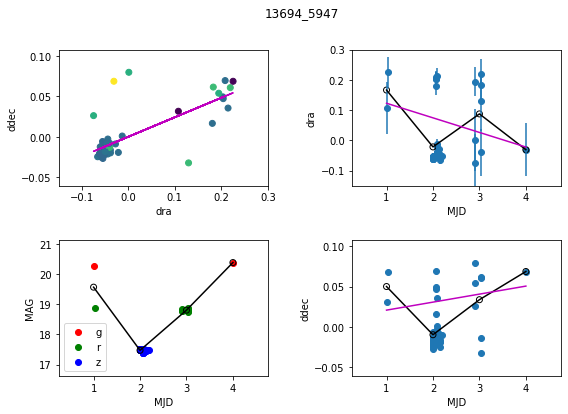

In [29]:
plots("13694_5947")
# plots("14026_205")
# for objj in obj["id"]:
#     plots(objj)

In [49]:
meas = qc.query(sql="select mjd,ra,dec,mag_auto,raerr,decerr,filter from nsc_dr2.meas where objectid='100097_7707'",fmt='table',profile='db01')

In [50]:
plt.scatter(dataselect["mjd"], dataselect["dec"])

TypeError: string indices must be integers

<IPython.core.display.Javascript object>


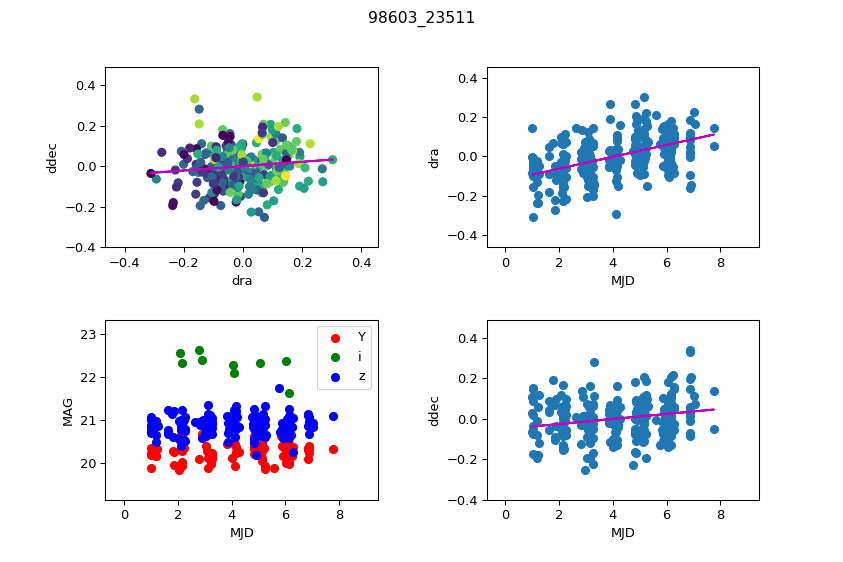

<IPython.core.display.Javascript object>


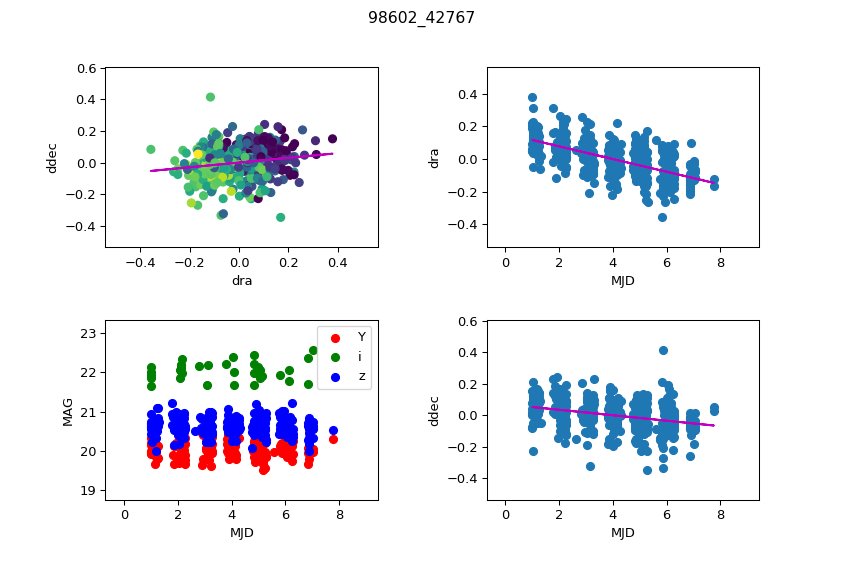

<IPython.core.display.Javascript object>


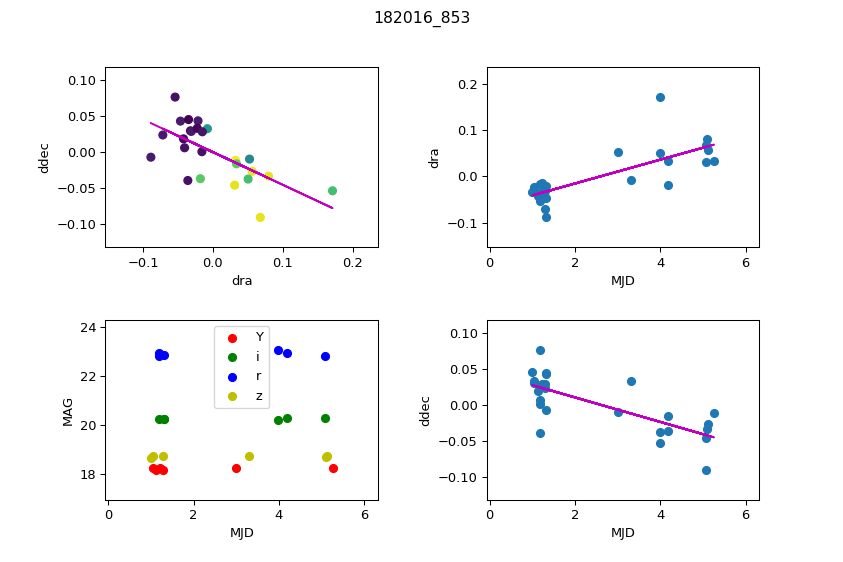

<IPython.core.display.Javascript object>


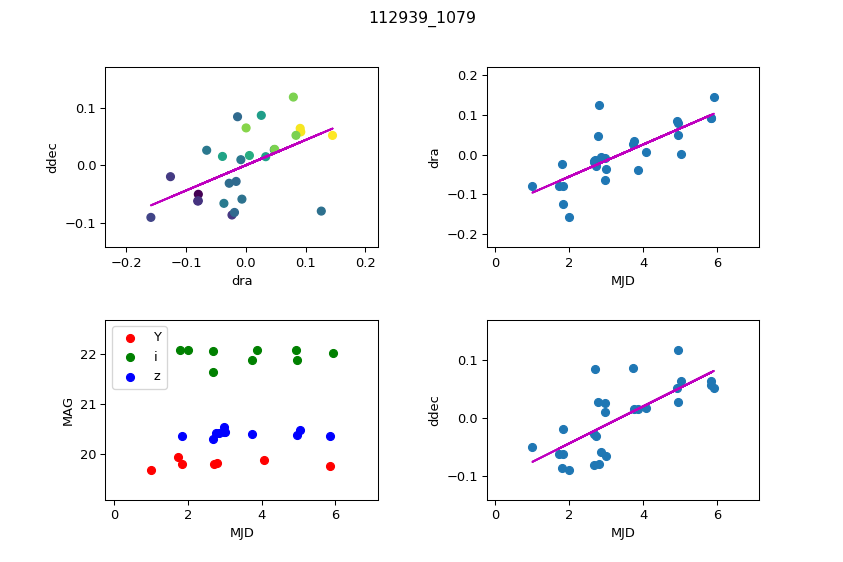

<IPython.core.display.Javascript object>


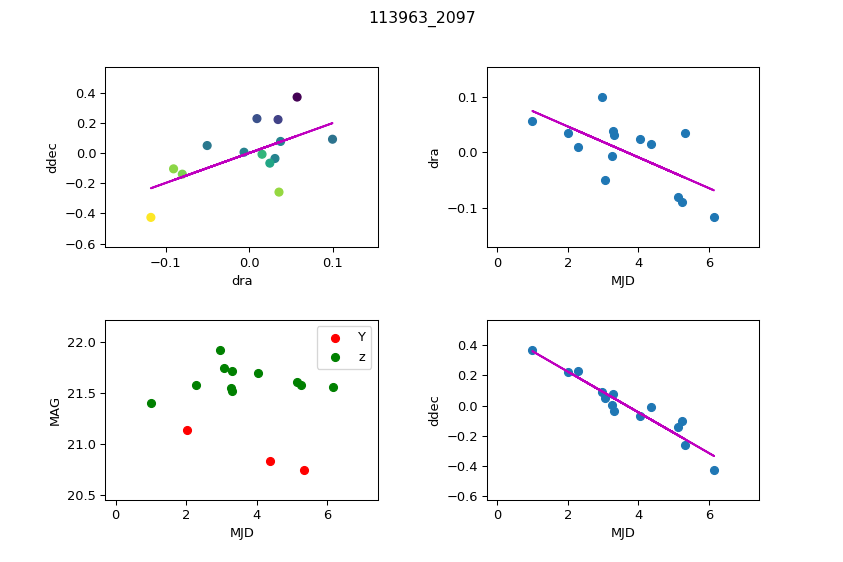

In [69]:
i = grabids(5)
for idd in i:
    plots(idd)